In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime

In [2]:
data = pd.read_csv('../data/modeloutput.csv')

In [3]:
data.head()

,Unnamed: 0,flow,rain_hour,level,rain_N_ago,dates,day_ofthe_month_1,day_ofthe_month_10,day_ofthe_month_11,day_ofthe_month_12,...,day_ofthe_week_0,day_ofthe_week_1,day_ofthe_week_2,day_ofthe_week_3,day_ofthe_week_4,day_ofthe_week_5,day_ofthe_week_6,holiday_0,holiday_1,predictions
0,0,1200.0,0.0583,1.028333,1,2018-01-01 00:00:00,1,0,0,0,...,1,0,0,0,0,0,0,0,1,979.368033
1,1,940.0,0.0448,0.376667,1,2018-01-01 01:00:00,1,0,0,0,...,1,0,0,0,0,0,0,0,1,163.617685
2,2,0.0,0.1409,0.160000,1,2018-01-01 02:00:00,1,0,0,0,...,1,0,0,0,0,0,0,0,1,221.120671
3,3,280.0,0.0714,0.061667,1,2018-01-01 03:00:00,1,0,0,0,...,1,0,0,0,0,0,0,0,1,195.047544
4,4,150.0,0.1340,0.343333,1,2018-01-01 04:00:00,1,0,0,0,...,1,0,0,0,0,0,0,0,1,247.654975


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True) #drop the old indecies
data['datumBeginMeting'] = pd.to_datetime(data["dates"],format='%Y-%m-%d %H:%M:%S')
data = data.set_index('datumBeginMeting', inplace=False)

In [5]:
dry = data[data['rain_N_ago'] == 0]


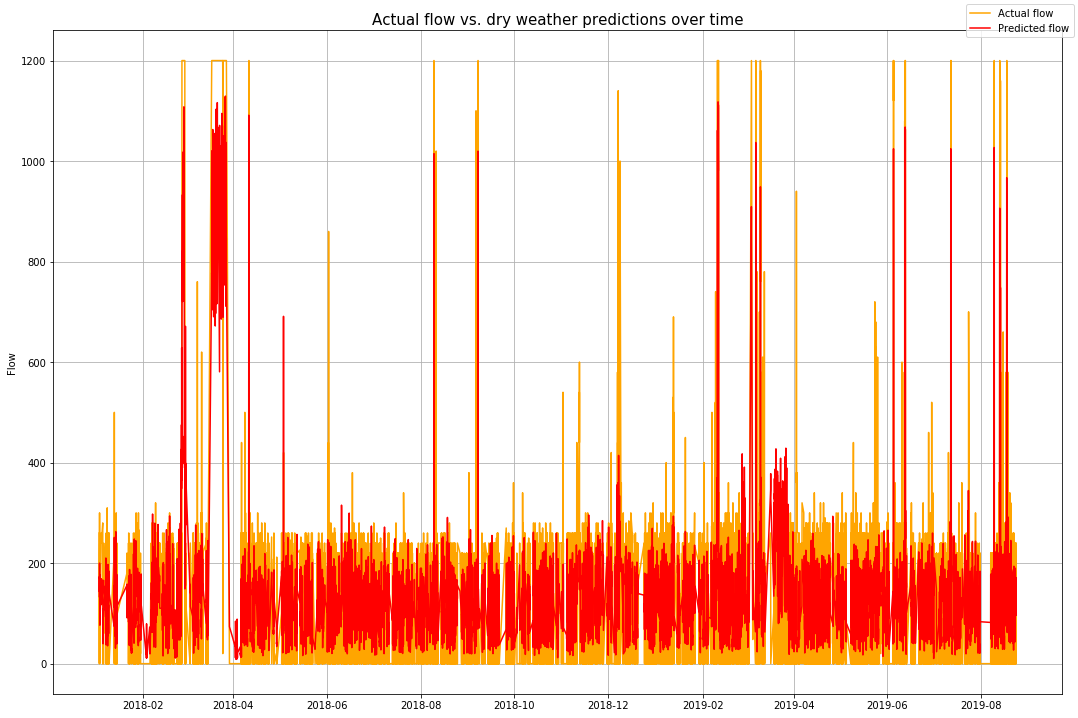

In [6]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['flow'], label = 'Actual flow', color='orange', linewidth = 1.5)
ax1.plot(dry.index, dry['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Flow', fontsize = 10)


plt.title('Actual flow vs. dry weather predictions over time', fontsize = 15)
plt.grid()
fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

# MSE

In [7]:
dry['Root Squared Error'] = ((dry['flow'] - dry['predictions'])**2)**0.5
dry['Squared Error'] = ((dry['flow'] - dry['predictions'])**2)

C:\Users\maren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\maren\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


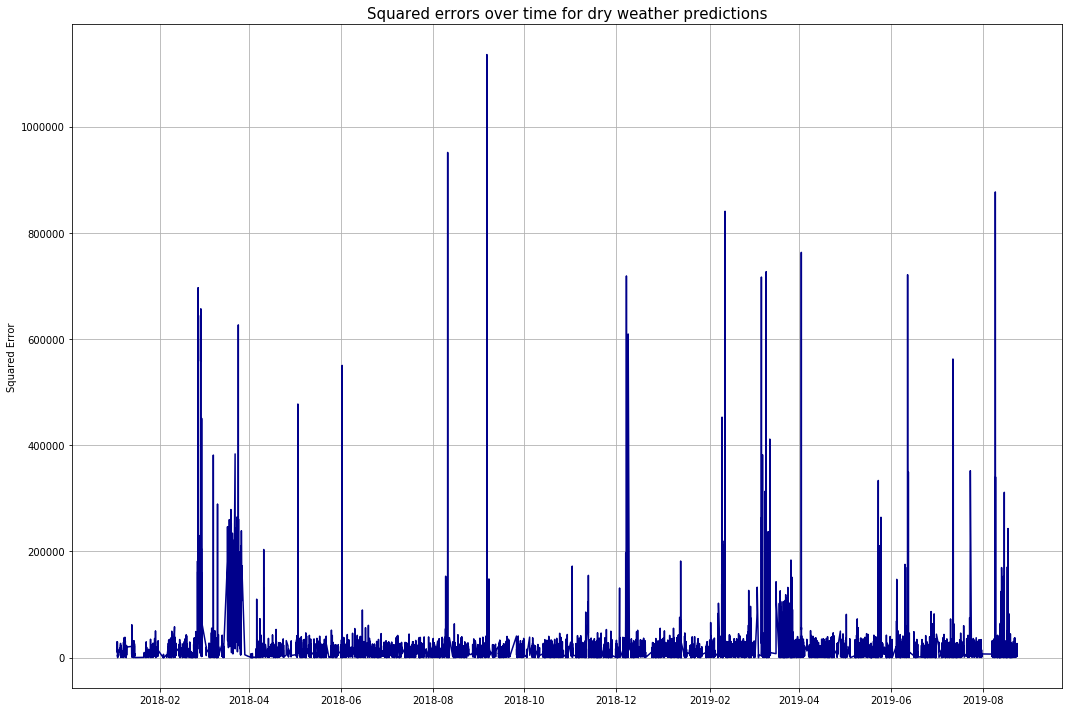

In [36]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['Squared Error'], color='darkblue', linewidth = 1.5)
#ax1.plot(data.index, data['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Squared Error', fontsize = 10)


plt.title('Squared errors over time for dry weather predictions', fontsize = 15)
plt.grid()
#fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

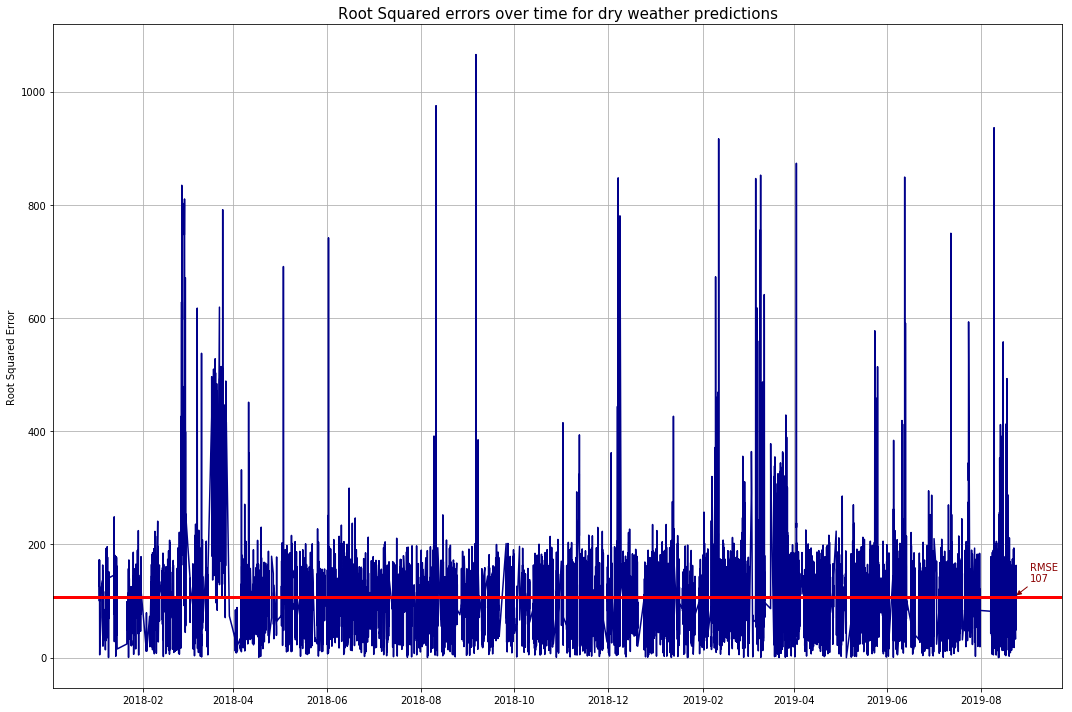

In [44]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(dry.index, dry['Root Squared Error'], color='darkblue', linewidth = 1.5)

ax1.axhline(dry['Root Squared Error'].mean(), linewidth = 3, color = 'red')
ax1.annotate('RMSE \n' + str(107), (mdates.date2num(datetime.date(2019, 8, 23)), dry['Root Squared Error'].mean()+1), xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(color='darkred', arrowstyle='-|>'), color = 'darkred')
#ax1.plot(data.index, data['predictions'], label = 'Predicted flow', color = 'red', linewidth = 1.5)
ax1.set_ylabel('Root Squared Error', fontsize = 10)


plt.title('Root Squared errors over time for dry weather predictions', fontsize = 15)
plt.grid()
#fig.legend()
fig.tight_layout();
fig.savefig("../graphs/"+"RootSquaredError.png")

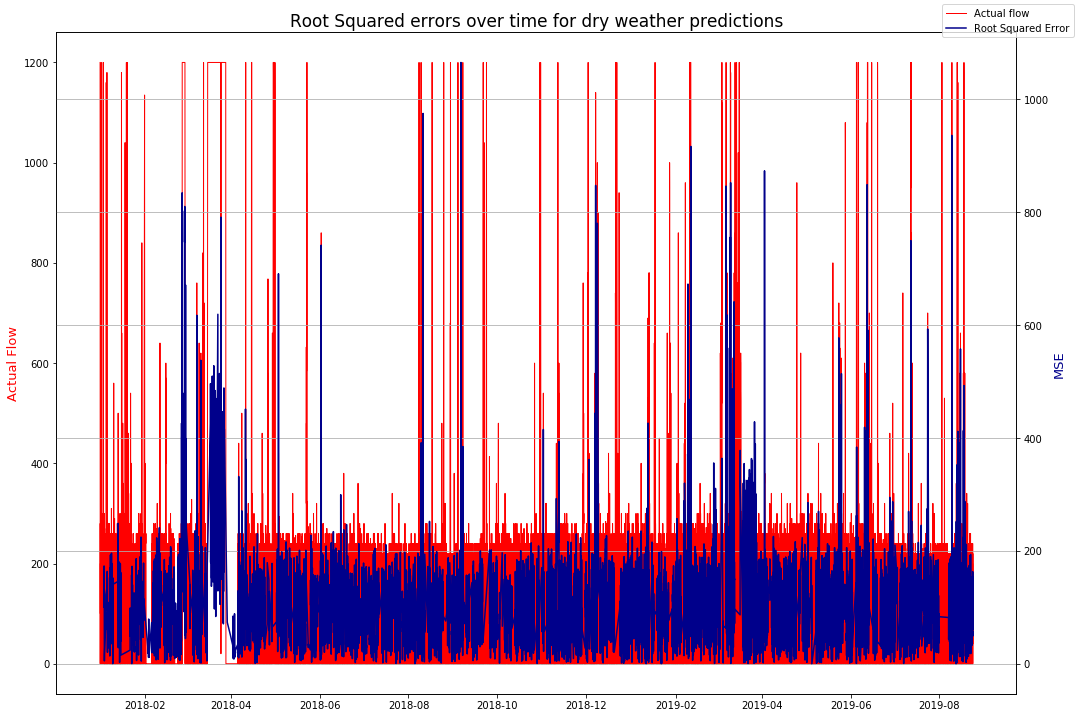

In [37]:
days = mdates.date2num((dry.index))

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(111)

ax1.plot(data.index, data['flow'], label = 'Actual flow', color = 'red', linewidth = 1)
ax1.set_ylabel('Actual Flow', fontsize = 13, color = 'red')


ax2 = ax1.twinx()
ax2.plot(dry.index, dry['Root Squared Error'],label = 'Root Squared Error', color='darkblue', linewidth = 1.5)
ax2.set_ylabel('MSE', fontsize = 13, color = 'darkblue')


plt.title('Root Squared errors over time for dry weather predictions', fontsize = 17)
plt.grid()
fig.legend()
fig.tight_layout();
#fig.savefig("../graphs/"+"FlowBehavior_new.png")

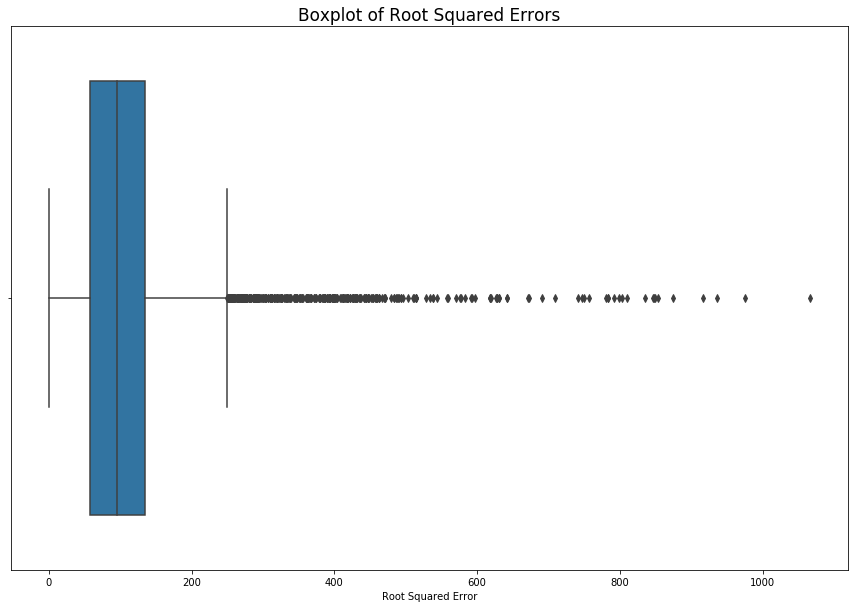

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(dry['Root Squared Error'])
plt.title("Boxplot of Root Squared Errors", fontsize = 17)
plt.savefig('../graphs/RootBoxplot.png');

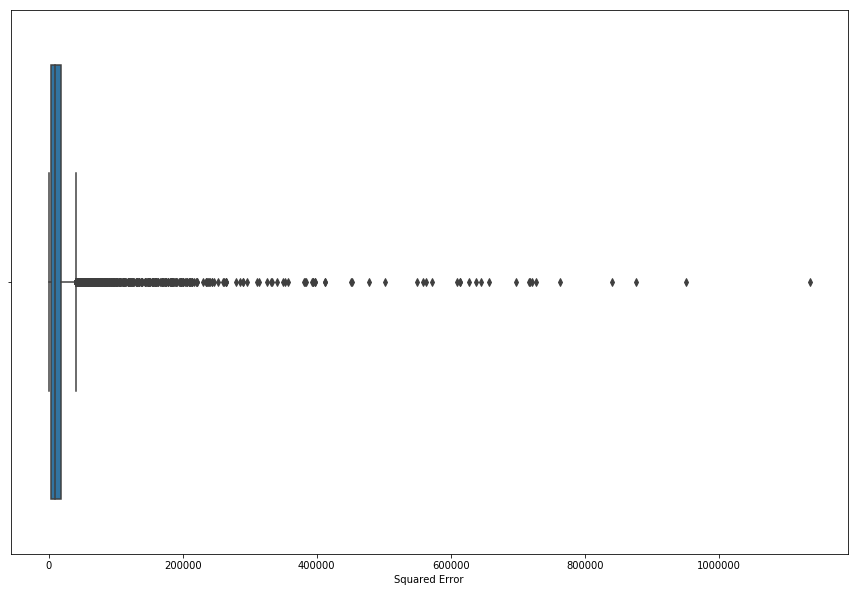

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(dry['Squared Error']);